In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

con = sqlite3.connect('../../datasets/checking-logs.sqlite')

## create two lists of values (for `working days` and for `weekends`) for the histogram input

In [2]:
df = pd.read_sql_query(
    '''
    SELECT timestamp AS commits
    FROM checker
    WHERE uid LIKE 'user_%'
    ''',
    con,
    parse_dates=['commits'],
)

filt = df['commits'].dt.dayofweek > 4

weekend_commits = df[filt]['commits'].dt.hour
working_day_commits = df[~filt]['commits'].dt.hour

working_day_commits

0        5
1        5
2        5
3        5
4        5
        ..
3202    20
3203    20
3204    20
3205    20
3206    20
Name: commits, Length: 2037, dtype: int32

## creating histogram

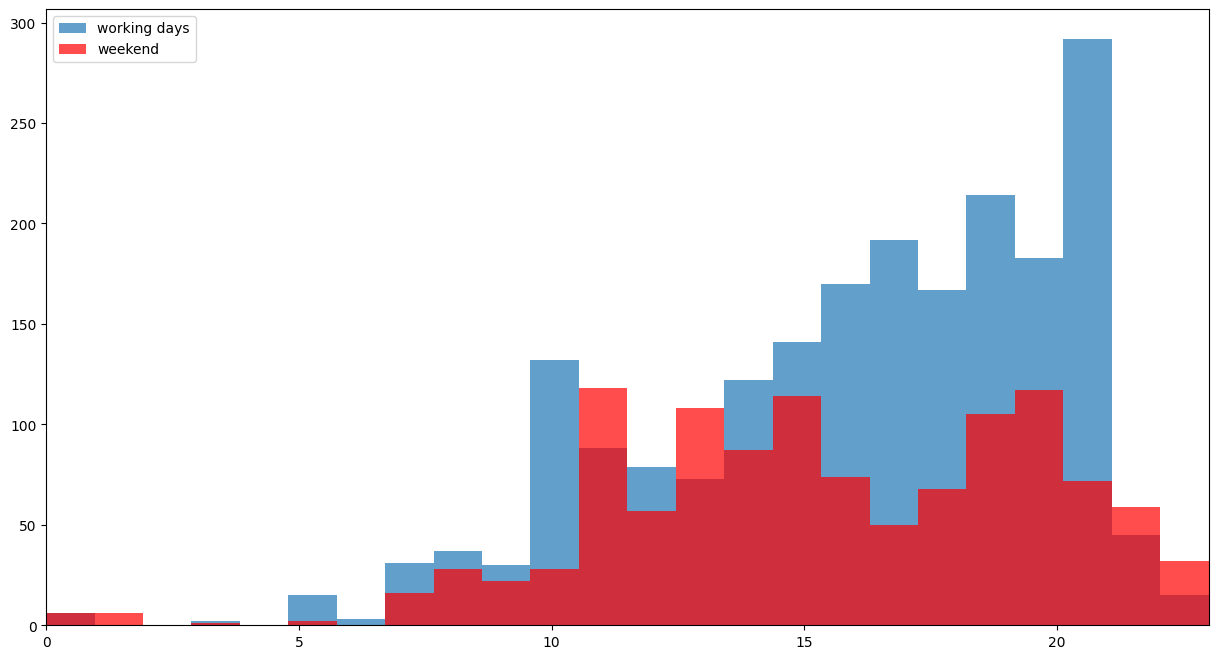

In [3]:
plt.figure(figsize=(15, 8))
plt.hist(
    working_day_commits,
    bins=24,
    label='working days',
    alpha=0.7,
)
plt.hist(
    weekend_commits,
    bins=24,
    label='weekend',
    alpha=0.7,
    color='RED',
)
plt.xlim(
    min(working_day_commits.min(), weekend_commits.min()),
    max(working_day_commits.max(), weekend_commits.max()),
)
plt.legend()
plt.show()

## “Are there hours when the total number of commits was higher on weekends than on working days?

Yes. 
* This hours are 11, 13, 22, 23 

In [4]:
con.close()